# A more detailed description

This notebook presents a bit more detail about the interactive built on the main notebook.

## "Math geek" explanation

The data generating process (DGP) considered to create the sythetic dataset here is the following:

$u = \lambda Wu + \epsilon$

Where $u$ is a vector spatially autocorrelated, $W$ is a spatial weights matrix as you could created with `PySAL`, and $\epsilon$ is an i.i.d. random vector.

We can rearrange terms to express $u$ as a function of $\epsilon$, which we can easily generate as a random noise:

1. $u - \lambda Wu = \epsilon$

1. $u (I - \lambda W) = \epsilon$

1. $u = (I - \lambda W)^{-1} \epsilon$

And this will give us, from a vector or randomly generated values, a particular $W$, and a pre-set $\lambda$, a vector of spatially autocorrelated values that we can plot both on a gridded map, and on a simple Moran Scatterplot. In this example, since we are using a perfect grid, we use a classic rook contiguity spatial weights matrix.

## "Code geek" explanation

To implement this DGP, we can write a method we will call `draw_map` that creates a random vector, transforms it into a spatially correlated variable with streength of $\lambda$, and allocates it into a lattice geography, where every pixel is assumed to be an area with a value. Right next to it, the code also displays the Moran's scatter plot. Both map and plot depend on the $\lambda$ parameter that controls the degree of spatial autocorrelation.

Here's the function:

In [5]:
def draw_map(lamb):
    '''
    Draw a map with a synthetic variable generated from 
    a spatially autoregressive GDP of strength `lamb`
    
    ...
    
    Arguments
    ---------
    lamb     : float
               Strength of the SAR process that generates 
               the sythetic data to map
    
    Returns
    -------
    None
    '''
    s = 20
    n = s**2
    w = lat2W(s, s, rook=False)
    w.transform = 'R'
    e = np.random.random((n, 1))
    u = inv(np.eye(n) - lamb * w.full()[0])
    u = np.dot(u, e)
    ul = lag_spatial(w, u)
    u = (u - u.mean()) / np.std(u)
    ul = (ul - ul.mean()) / np.std(ul)
    gu = u.reshape((s, s))
    # Figure
    f = plt.figure(figsize=(9, 4))
    ax1 = f.add_subplot(121)
    ax1.matshow(gu, cmap=plt.cm.YlGn)
    ax1.set_frame_on(False)
    ax1.axes.get_xaxis().set_visible(False)
    ax1.axes.get_yaxis().set_visible(False)
    #---
    ax2 = f.add_subplot(122)
    ols = spreg.OLS(ul, u)
    tag = "b = %.3f"%ols.betas[1][0]
    sc = sns.regplot(u.ravel(), ul.ravel(), ax=ax2)
    sc = sns.regplot(u.ravel(), ul.ravel(), ax=ax2, \
                     scatter=False, label=tag)
    ax2.axvline(0, c='0.5', linewidth=0.5)
    ax2.axhline(0, c='0.5', linewidth=0.5)
    ax2.legend()
    plt.xlabel('u')
    plt.ylabel('Wu')
    plt.suptitle("$\lambda$ = %.2f"%lamb)
    plt.show()
    return None

And here is a simple, static run of the function for a value of $\lambda = 0.95$:

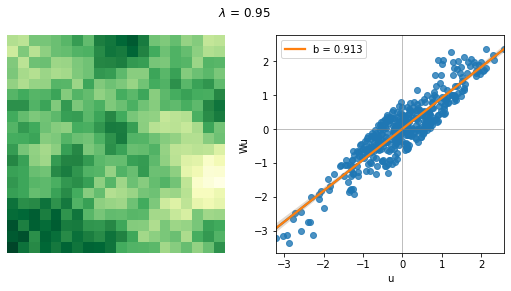

In [6]:
draw_map(0.95)

## License

**NOTE**: this notebook is a modified version of [this other one](http://nbviewer.ipython.org/gist/darribas/9943372) and it's stored as a Github repository on the following address:

> [https://github.com/darribas/int_sp_auto](https://github.com/darribas/int_sp_auto)

A static HTML version can be found [here](http://nbviewer.ipython.org/github/darribas/int_sp_auto/blob/master/index.ipynb).

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img
alt="Creative Commons License" style="border-width:0"
src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span
xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Binder notebook for interactive spatial autocorrelation</span> by <a xmlns:cc="http://creativecommons.org/ns#"
href="http://darribas.org" property="cc:attributionName"
rel="cc:attributionURL">Dani Arribas-Bel</a> is licensed under a <a rel="license"
href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons
Attribution-NonCommercial-ShareAlike 4.0 International License</a>